In [1]:
# importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Reading our both datasets

df1=pd.read_csv("/content/dataset1_cleaned.csv")
df2=pd.read_csv('/content/dataset2_cleaned.csv')

In [3]:
#dataset exploration
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,27/01/2018 23:44,0.04941,fast,27/01/2018 23:44,27/01/2018 23:50,12,0,1,1,27/01/2018 17:09,6.591111,0
1,27/01/2018 23:44,1.00000,fast,27/01/2018 23:44,27/01/2018 23:50,14,0,1,1,27/01/2018 17:09,6.591667,0
2,27/01/2018 23:45,6.00000,rat,27/01/2018 23:44,27/01/2018 23:50,49,1,0,1,27/01/2018 17:09,6.601389,0
3,27/01/2018 23:45,3.00000,fast,27/01/2018 23:44,27/01/2018 23:50,68,0,1,1,27/01/2018 17:09,6.606667,0
4,27/01/2018 23:45,8.00000,rat,27/01/2018 23:44,27/01/2018 23:50,84,1,0,1,27/01/2018 17:09,6.611111,0


In [4]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


**Descriptive Analysis**

Vigilance:

So, we have a variable "bat_landing_to_food" which describes the time difference after a bat lands and before it appraches the food
We will analyse this to find out about the vigilance by bat.


In [5]:
vigilance_mean=df1['bat_landing_to_food'].mean()            #Calculating mean
vigilance_median=df1['bat_landing_to_food'].median()        #Calculating median
print(f'vigilance_mean: {vigilance_mean:.1f}')
print(f'vigilance_median: {vigilance_median:.1f}')

vigilance_mean: 8.8
vigilance_median: 4.0


/tmp/ipython-input-2327861167.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


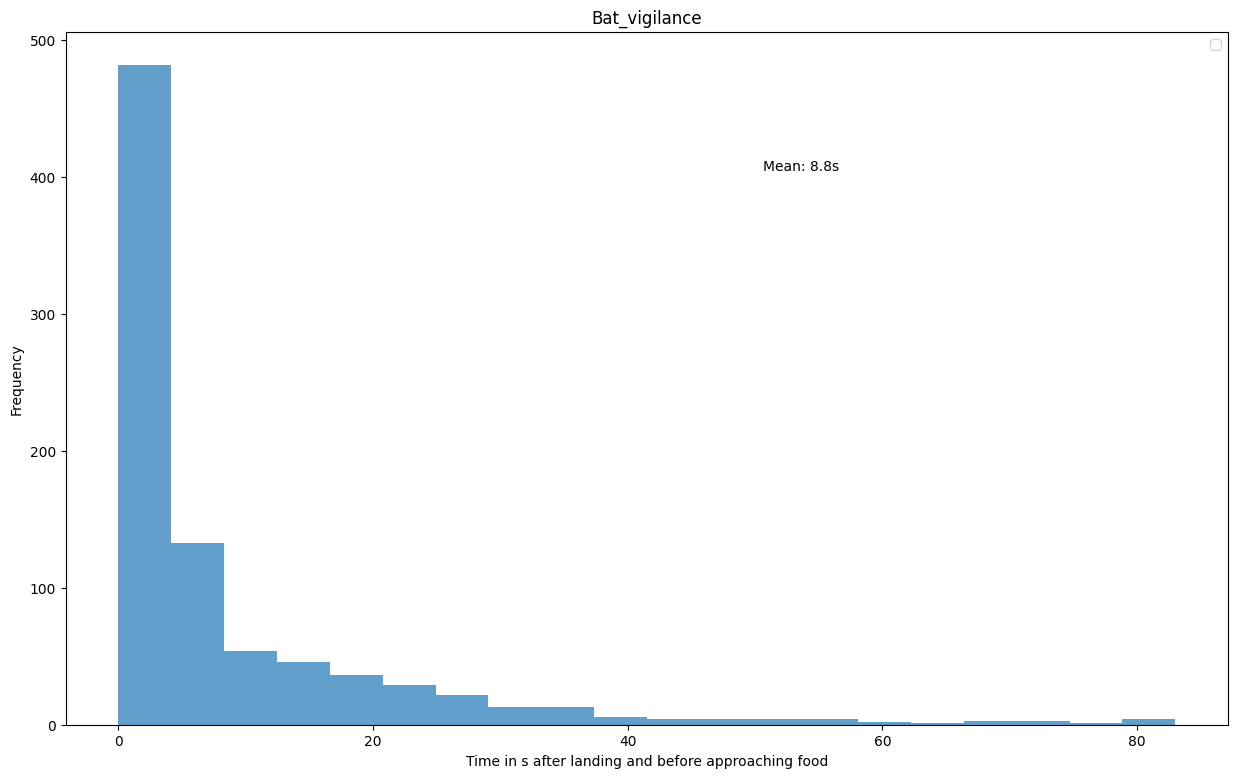

In [6]:
#visualizing
plt.figure(figsize=(15,9))
plt.hist(df1['bat_landing_to_food'],bins=20,alpha=0.7)
plt.title('Bat_vigilance')
plt.xlabel('Time in s after landing and before approaching food')
plt.ylabel('Frequency')
plt.text(0.6,0.8, f'Mean: {vigilance_mean:.1f}s', transform=plt.gca().transAxes)
plt.legend()
plt.show()

So, from the above plot, it is clear that on average, bats take 8.8sec to approach food after landing. This is a significant waiting time. This shows that bats view rats as predators,
because if they didnt, they would rush to get the food after landing.

Now, we will take a look at the risk column in dataset 1.
We have,
0- risk avoidance by bats
1- risk taken by bats
We will compare both percentages to see if bats avoid risk or take more risk.

If avoidance % is high, then bats see rats as predators.
If risk taken % is high, they generally dont see rats as predators.


In [7]:
risk=df1['risk'].value_counts(normalize=True)       #calculating how many incidents of risk avoidance (0) and risk taken (1) are there. normalizing them
risk_avoid_percentage=risk[0]*100                     #calculating % so visulaizing is easier
risk_taken_percentage=risk[1]*100

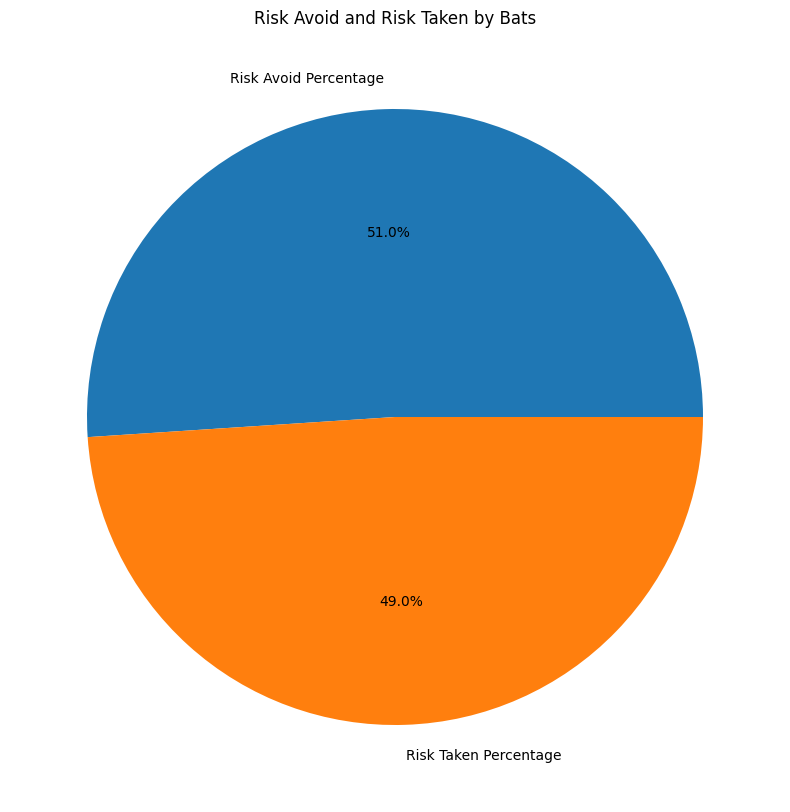

In [8]:
#Plotting a pie chart for visualizing the two categories
plt.figure(figsize=(10,10))
labels=['Risk Avoid Percentage', 'Risk Taken Percentage']
sizes=[risk_avoid_percentage,risk_taken_percentage]
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title("Risk Avoid and Risk Taken by Bats")
plt.show()

We can see from above, risk avoidance is higher. so bats definitely see rats as predators because they dont want to take risk vs rats while getting food.


Now we will see timing of bats when rats arrive.

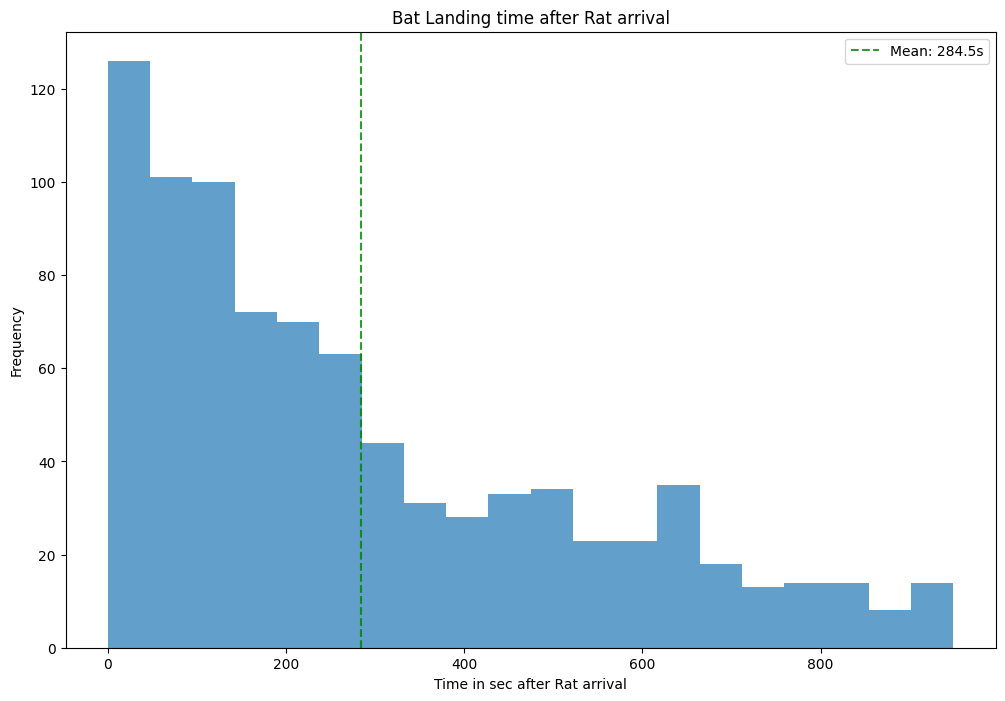

In [11]:
time_mean=df1['seconds_after_rat_arrival'].mean()
plt.figure(figsize=(12,8))
plt.hist(df1['seconds_after_rat_arrival'],bins=20,alpha=0.7)
plt.axvline(time_mean, color="green", linestyle="dashed", alpha=0.8, label=f"Mean: {time_mean:.1f}s")
plt.title('Bat Landing time after Rat arrival')
plt.xlabel('Time in sec after Rat arrival')
plt.ylabel('Frequency')
plt.legend()
plt.show()

From above, we can see the average time for bat to land after arrival of rat is 284.5s which is a lot. This shows bats consider rats as predators.

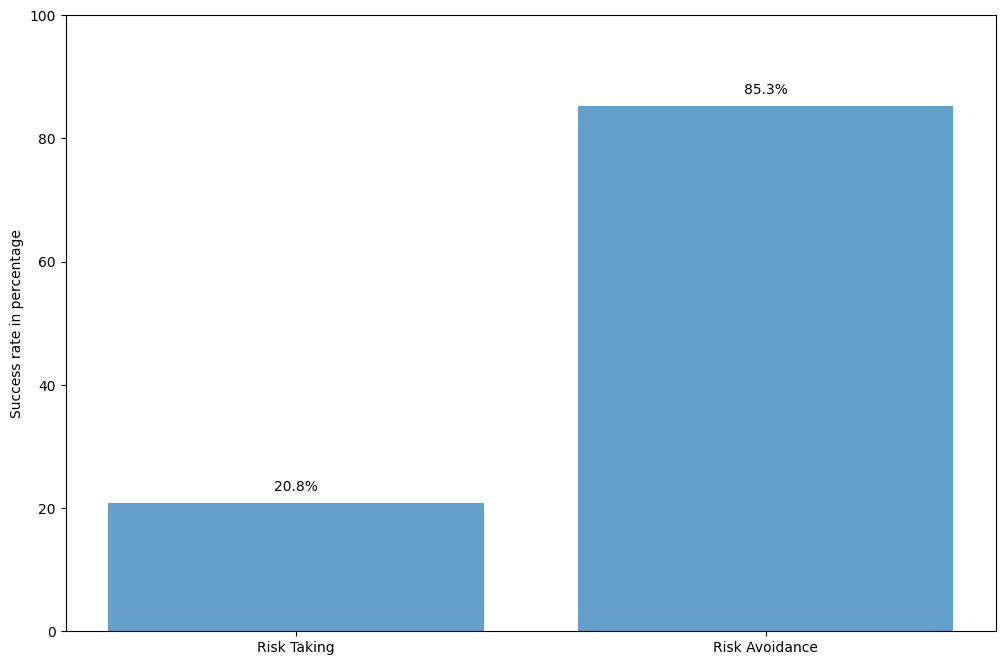

In [16]:
'''
we have, 0--risk avoiding bats
         1--risk taking bats
'''

#For risk avoiding bats,

success_avoiding=df1[df1['risk']==0]['reward'].mean()

#for risk taking bats,
success_taking=df1[df1['risk']==1]['reward'].mean()

#calculate percentages
success_avoiding_percentage=success_avoiding *100
success_taking_percentage=success_taking *100

#Visualizing

plt.figure(figsize=(12,8))
behavior=['Risk Taking', 'Risk Avoidance']
success_rates=[success_taking_percentage, success_avoiding_percentage]
plt.bar(behavior, success_rates,alpha=0.7)
plt.title('')
plt.ylabel('Success rate in percentage')
plt.ylim(0,100)

for i, rate in enumerate(success_rates):
  plt.text(i,rate+2, f'{rate:.1f}%', ha='center')

plt.show()

From dataset2, lets look at rat_arrival_number and bat_landing_number

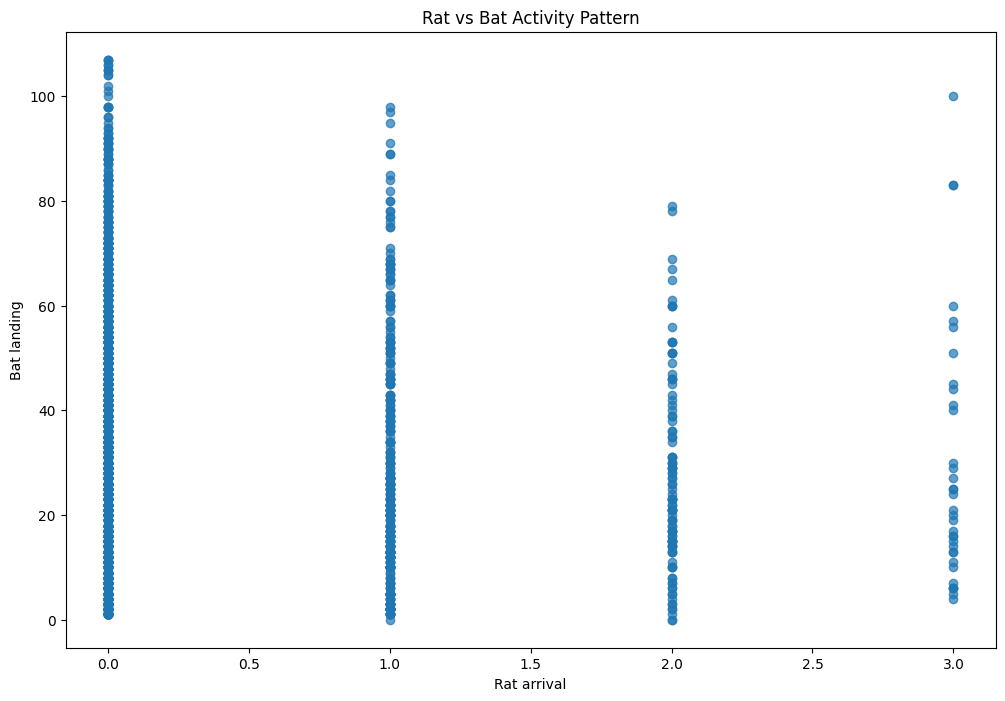

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(df2['rat_arrival_number'],df2['bat_landing_number'], alpha=0.7)
plt.title('Rat vs Bat Activity Pattern')
plt.xlabel('Rat arrival')
plt.ylabel('Bat landing')

plt.show()

This clearly suggests that within a 30 min period, when there are no rat arrival, the number of bat landing is highest. The bat landings decrease significantly when there are 2 or more rat arrivals.